In [105]:
from pytrends.request import TrendReq
import pandas as pd
import pytrends
import yfinance
import plotly.graph_objects as go
import pandas as pd
from sklearn import preprocessing
import seaborn as sns

In [199]:
def get_trends(sword, sdate, edate):

    pytrend = TrendReq()
    KEYWORDS_CODES=[pytrend.suggestions(keyword=sword)[0]]
    df_CODES = pd.DataFrame(KEYWORDS_CODES)
    EXACT_KEYWORDS=df_CODES['mid'].to_list()
    DATE_INTERVAL=f'{sdate} {edate}'
    COUNTRY=["US"]
    CATEGORY=0
    SEARCH_TYPE=''
    
    Individual_EXACT_KEYWORD = list(zip(*[iter(EXACT_KEYWORDS)]*1))
    Individual_EXACT_KEYWORD = [list(x) for x in Individual_EXACT_KEYWORD]
    dicti = {}
    i = 1
    for Country in COUNTRY:
        for keyword in Individual_EXACT_KEYWORD:
            pytrend.build_payload(kw_list=keyword, 
                                  timeframe = DATE_INTERVAL, 
                                  geo = Country, 
                                  cat=CATEGORY,
                                  gprop=SEARCH_TYPE) 
            dicti[i] = pytrend.interest_over_time()
            i+=1
    df_trends = pd.concat(dicti, axis=1)
    
    df_trends.columns = df_trends.columns.droplevel(0) #drop outside header
    df_trends = df_trends.drop('isPartial', axis = 1) #drop "isPartial"
    df_trends.reset_index(level=0,inplace=True) #reset_index
    df_trends.columns=['Date', sword] #change column names
    
    return df_trends

In [ ]:
    sns.set(color_codes=True)
    dx = df_trends.plot(figsize = (12,8),x="date", y=['GAME-US'], kind="line", title = "Game Google Trends")
    dx.set_xlabel('Date')
    dx.set_ylabel('Trends Index')
    dx.tick_params(axis='both', which='both', labelsize=10)

In [230]:
def get_yf(ticker, sdate='2021-01-01', edate='2022-01-01'):
    
    data = yfinance.Ticker(ticker)
    hist = data.history(start=sdate, end=edate)
    hist = hist.reset_index()
    
    return hist

In [234]:
def yf_scaled(hist):
    hist = hist[['Date', 'Close', 'Volume']]
    date_col = hist[['Date']]
    x = hist[['Close', 'Volume']].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    hist_scaled = pd.DataFrame(x_scaled)
    hist_scaled['Date'] = date_col
    hist_scaled.columns =['Close', 'Volume', 'Date']
    
    hist_scaled['Volume'] = hist_scaled['Volume'].apply(lambda x: x*100)
    hist_scaled['Close'] = hist_scaled['Close'].apply(lambda x: x*100)
    
    return hist_scaled

In [235]:
def graph_yf(hist):
    return go.Figure(data=go.Scatter(x=hist['Date'],y=hist['Close'], mode='lines'))

In [260]:
def graph_combined(df_trends, hist_scaled):
    graph = pd.merge(
            df_trends,
            hist_scaled,
            how="inner",
            left_on='Date',
            right_on='Date',
        )
    
    x_col = df_trends.columns[1]

    sns.set(color_codes=True)
    dx = graph.plot(figsize = (12,8),x="Date", y=[x_col, 'Close', 'Volume'], kind="line", title = x_col + " Trends")
    dx.set_xlabel('Date')
    dx.set_ylabel('Trends Index')
    dx.tick_params(axis='both', which='both', labelsize=10)
    
    return dx

<AxesSubplot:title={'center':'AMC Trends'}, xlabel='Date', ylabel='Trends Index'>

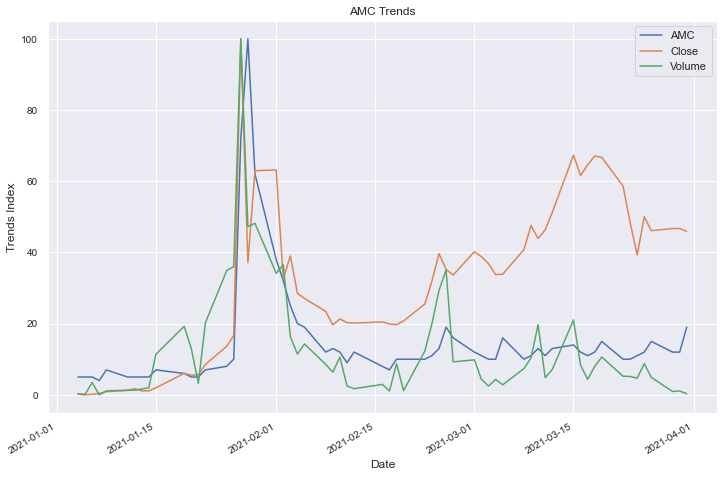

In [325]:
key = 'AMC'
sdate = '2021-01-01'
edate = '2021-04-01'

df_trending = get_trends(key, sdate, edate)
hist = get_yf(key, sdate, edate)
hist_scaled = yf_scaled(hist)
# graph_yf(hist)
graph_combined(df_trending, hist_scaled)

<AxesSubplot:title={'center':'GME Trends'}, xlabel='Date', ylabel='Trends Index'>

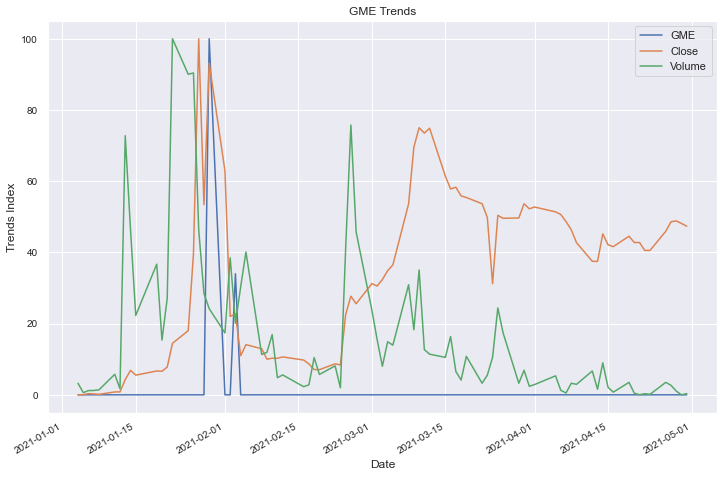

In [326]:
key = 'GME'
sdate = '2021-01-01'
edate = '2021-05-01'

df_trending = get_trends('GameStop', sdate, edate)
hist = get_yf(key, sdate, edate)
hist_scaled = yf_scaled(hist)
# graph_yf(hist)
graph_combined(df_trending, hist_scaled)

In [329]:
key = 'BB'
sdate = '2021-09-01'
edate = '2021-05-01'

df_trending = get_trends('BlackBerry', sdate, edate)
hist = get_yf(key, sdate, edate)
hist_scaled = yf_scaled(hist)
# graph_yf(hist)
graph_combined(df_trending, hist_scaled)

ResponseError: The request failed: Google returned a response with code 400.